In [1]:
import numpy as np
import os
import cv2

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
root_dir = '../All_data_sets/dataset'

In [3]:
os.listdir(root_dir)

['.ipynb_checkpoints',
 'dog_1.jpeg',
 'dog_2.jpeg',
 'dog_3.jpg',
 'dog_4.jpg',
 'mb_1.jpeg',
 'mb_2.jpeg',
 'pichuka_1.jpeg',
 'pichuka_10.jpg',
 'pichuka_10.webp',
 'pichuka_11.jpeg',
 'pichuka_12.jpg',
 'pichuka_2.jpeg',
 'pichuka_3.jpeg',
 'pichuka_4.jpeg',
 'pichuka_5.jpeg',
 'pichuka_6.jpeg',
 'pichuka_7.jpeg',
 'pichuka_8.jpg',
 'pichuka_9.jpg',
 'sample_video.mp4']

In [4]:
image_list = os.listdir(root_dir)[1:]

image_list

['dog_1.jpeg',
 'dog_2.jpeg',
 'dog_3.jpg',
 'dog_4.jpg',
 'mb_1.jpeg',
 'mb_2.jpeg',
 'pichuka_1.jpeg',
 'pichuka_10.jpg',
 'pichuka_10.webp',
 'pichuka_11.jpeg',
 'pichuka_12.jpg',
 'pichuka_2.jpeg',
 'pichuka_3.jpeg',
 'pichuka_4.jpeg',
 'pichuka_5.jpeg',
 'pichuka_6.jpeg',
 'pichuka_7.jpeg',
 'pichuka_8.jpg',
 'pichuka_9.jpg',
 'sample_video.mp4']

## Read the image

In [5]:
image = cv2.imread( os.path.join( root_dir , image_list[6] ) )

## find the shape of an image

In [6]:
image.shape

(227, 222, 3)

## 227 is the height(row)
## 222 is width(cols)
## 3 color channels (RGB)

## display image

In [7]:
cv2.imshow('pichuka', image )

# set delay
cv2.waitKey(2000)

-1

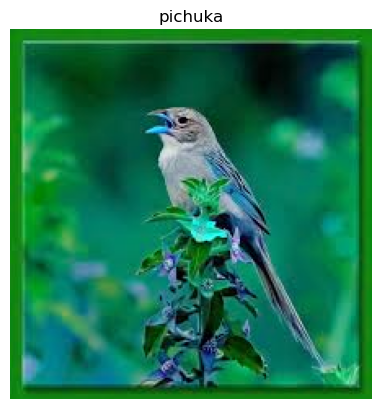

In [8]:
plt.title('pichuka')
plt.imshow(image)
plt.axis(False)
plt.show()

## Read the video

In [9]:
video = cv2.VideoCapture( os.path.join( root_dir , "sample_video.mp4" ) )

In [10]:
video

< cv2.VideoCapture 0000019283B172F0>

## displaying video

In [11]:
ret = True

while ret:
    ret , frame = video.read()
    if ret:
       cv2.imshow( 'frame' , frame )
       cv2.waitKey( 40 )

In [12]:
video.release()
cv2.destroyAllWindows()

## accessing webcam

In [13]:
webcam = cv2.VideoCapture(2)

In [14]:
webcam

< cv2.VideoCapture 0000019283BED230>

In [15]:
# while True:
#     ret , frame = webcam.read()
#     if ret:
#        cv2.imshow( 'frame' , frame )
#        if cv2.waitKey(40) & 0xFF == ord('q'):
        # break

# webcam.release()
# cv2.destroyAllWindows()

In [16]:
def displayImage( src ):
    plt.title('pichuka')
    plt.imshow(src)
    plt.axis(False)
    plt.show()
    

## Image operations

In [17]:
image.shape

(227, 222, 3)

## reshape / resize the image

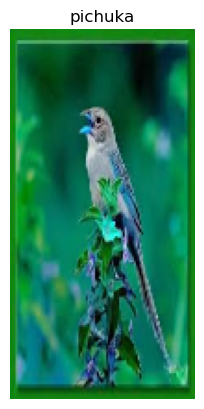

In [18]:
# width and height
resized_image = cv2.resize( image , ( 100 , 200 ) )


displayImage( resized_image )

In [19]:
resized_image.shape

(200, 100, 3)

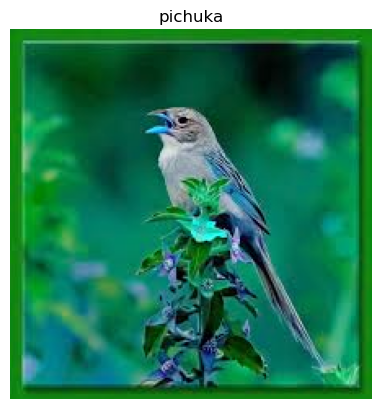

In [20]:
displayImage(image)

## cropping the image

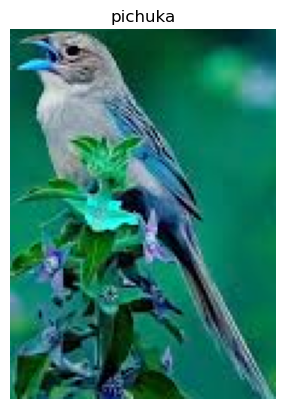

In [21]:
# set height starting row is 47 to 200
# set width staring col is 80 to 190
cropped_image = image[ 47:200 , 80:190 ]

displayImage(cropped_image)

In [22]:
cropped_image.shape

(153, 110, 3)

In [23]:
def read_all_image():
    all_images = []
    for item in image_list:
        all_images.append( cv2.imread( os.path.join( root_dir , item ) ) )
    return all_images

In [24]:
all_images = read_all_image()

In [25]:
len( all_images )

20

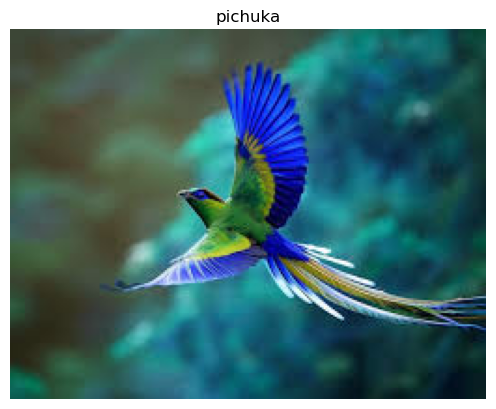

In [26]:
displayImage(all_images[15])

## color spaces

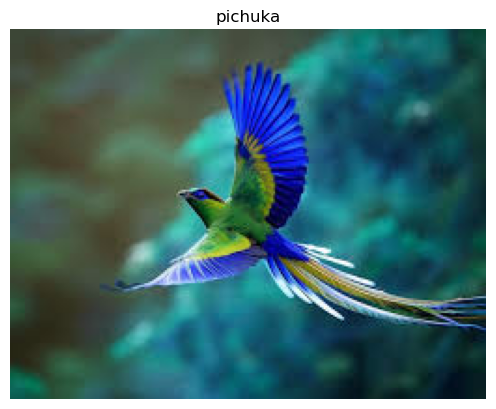

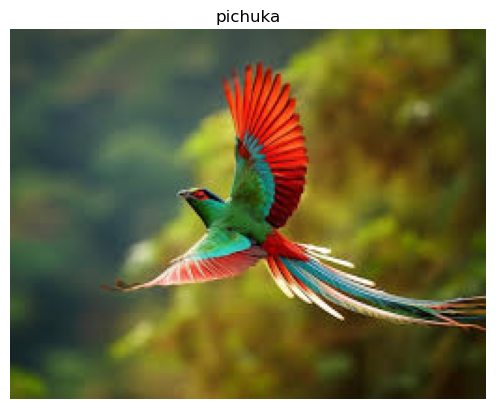

In [27]:
img_rgb = cv2.cvtColor( all_images[15] , cv2.COLOR_BGR2RGB )


displayImage( all_images[15] )
displayImage( img_rgb )

In [28]:
all_images[15].shape

(198, 255, 3)

In [29]:
img_rgb.shape

(198, 255, 3)

## gray scale

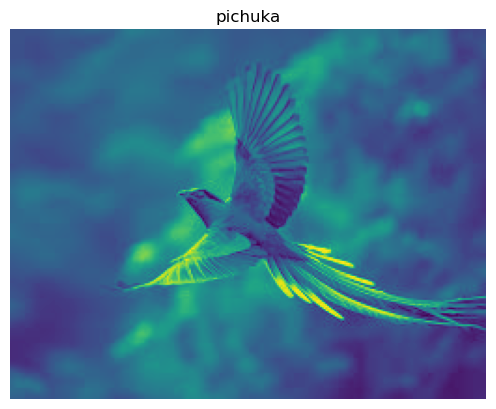

In [30]:
img_gray_scale = cv2.cvtColor( all_images[15] , cv2.COLOR_BGR2GRAY )

displayImage( img_gray_scale )

In [31]:
img_gray_scale.shape

(198, 255)

## bluring

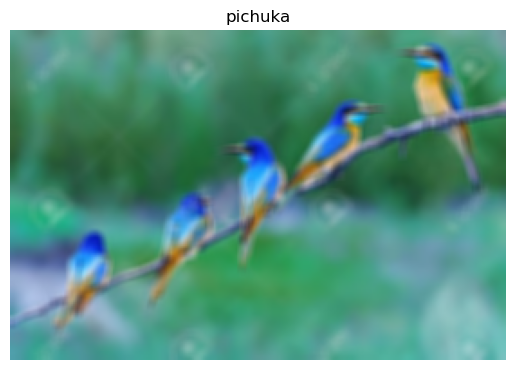

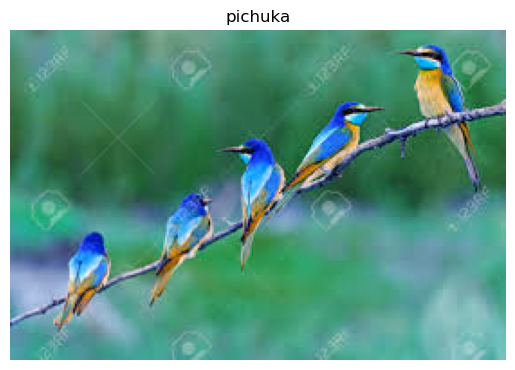

In [32]:
img_blur = cv2.blur( all_images[13] , ( 5,5 ) )

displayImage( img_blur )
displayImage( all_images[13] )

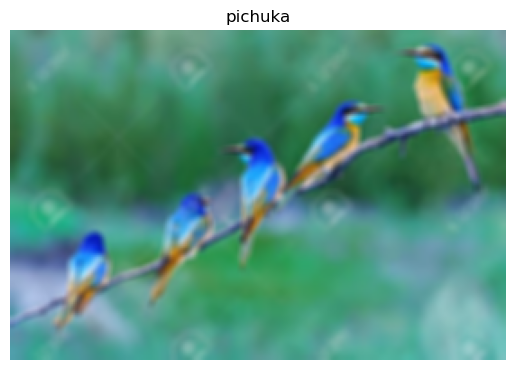

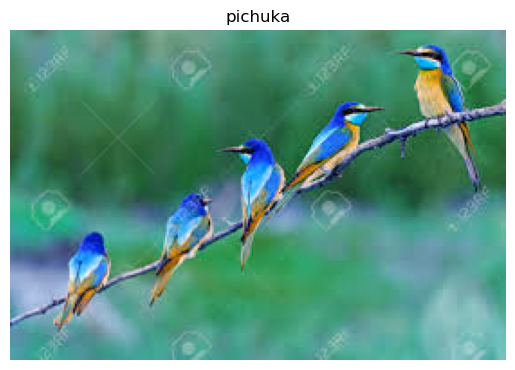

In [33]:
img_gausian_blur = cv2.GaussianBlur( all_images[13] , ( 5,5 ),2 )

displayImage( img_gausian_blur )
displayImage( all_images[13] )

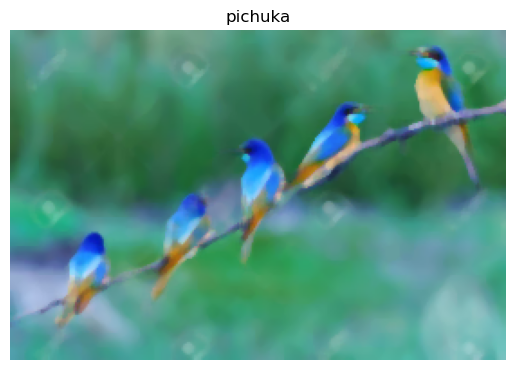

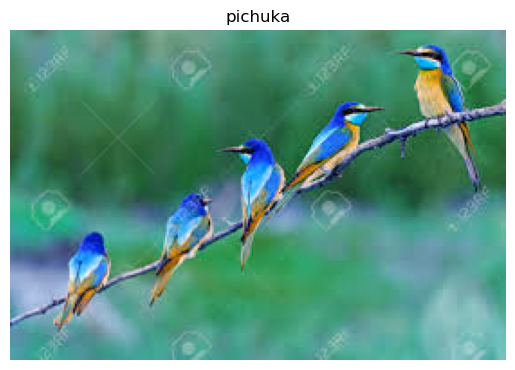

In [34]:
img_medium_blur = cv2.medianBlur( all_images[13] , 5 )

displayImage( img_medium_blur )
displayImage( all_images[13] )

## threshold

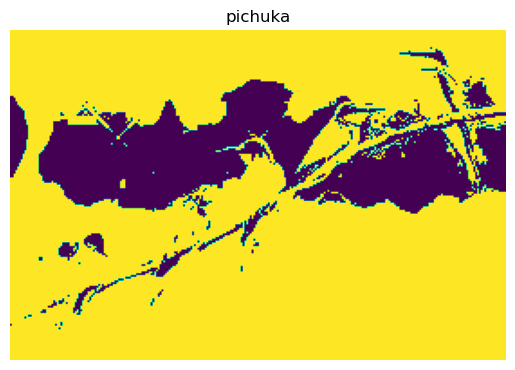

In [35]:
img_gray = cv2.cvtColor( all_images[13] , cv2.COLOR_BGR2GRAY )

img_thresold = cv2.threshold( img_gray , 100 , 255 ,cv2.THRESH_BINARY)

displayImage(img_thresold[1])

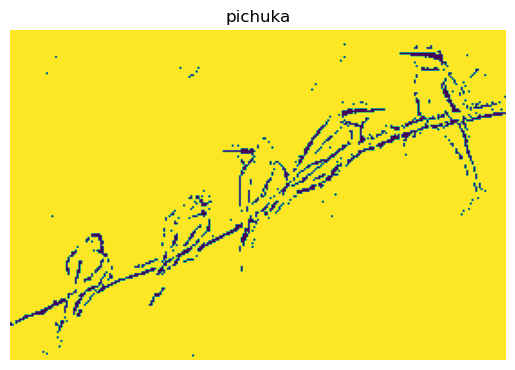

In [36]:
thresh = cv2.adaptiveThreshold( img_gray , 255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C ,cv2.THRESH_BINARY,11,20)

displayImage(thresh)

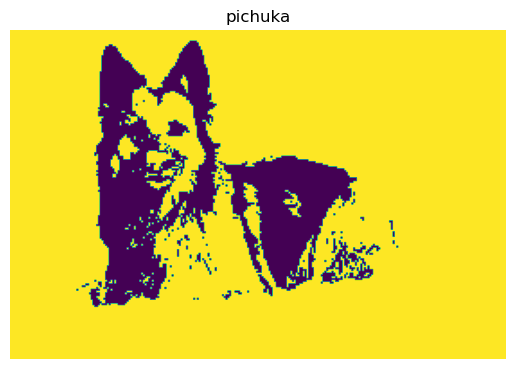

In [37]:
dog_gray = cv2.cvtColor( all_images[0] , cv2.COLOR_BGR2GRAY )

_ , thresh = cv2.threshold( dog_gray , 120 , 255 ,cv2.THRESH_BINARY )

displayImage(thresh)

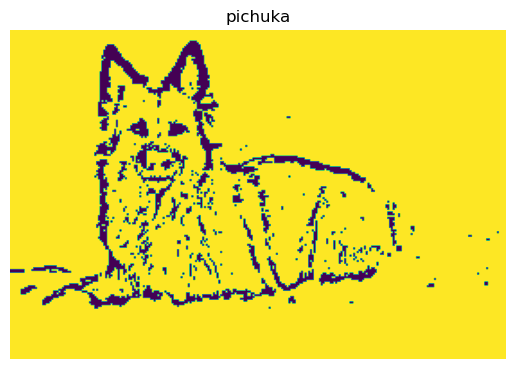

In [38]:
ada_thresh = cv2.adaptiveThreshold( dog_gray , 255,cv2.ADAPTIVE_THRESH_MEAN_C ,cv2.THRESH_BINARY,11,20)

displayImage(ada_thresh)

## Edge detectors

In [39]:
img_1 = all_images[2]
img_2 = all_images[3]

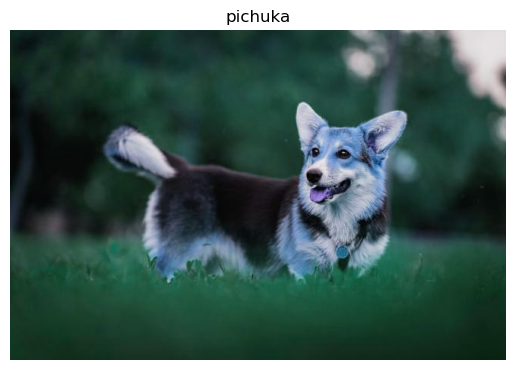

In [40]:
displayImage(img_1)

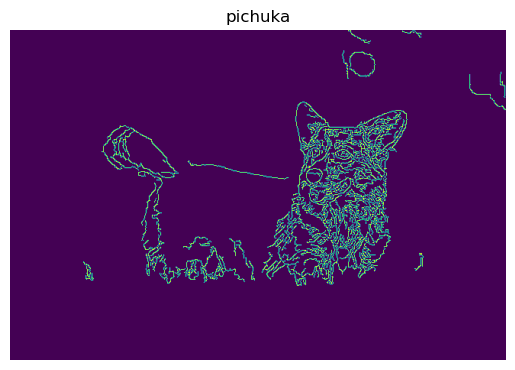

In [41]:
img_1_gray = cv2.cvtColor( img_1 , cv2.COLOR_BGR2GRAY )
img_1_edge = cv2.Canny( img_1_gray , 40 , 150 )

displayImage( img_1_edge )

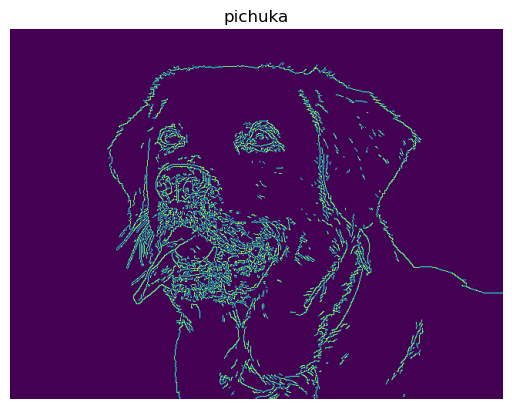

In [42]:
img_2_gray = cv2.cvtColor( img_2 , cv2.COLOR_BGR2GRAY )
img_2_edge = cv2.Canny( img_2_gray , 100 , 150 )

displayImage( img_2_edge )

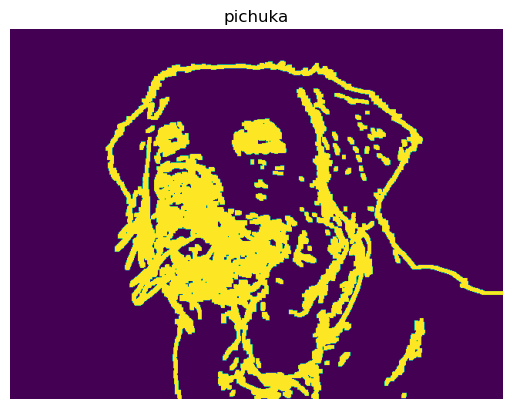

In [43]:
img_1_edge_d = cv2.dilate( img_2_edge , np.ones( (5,5) , dtype=np.int8 ) )

displayImage(img_1_edge_d)

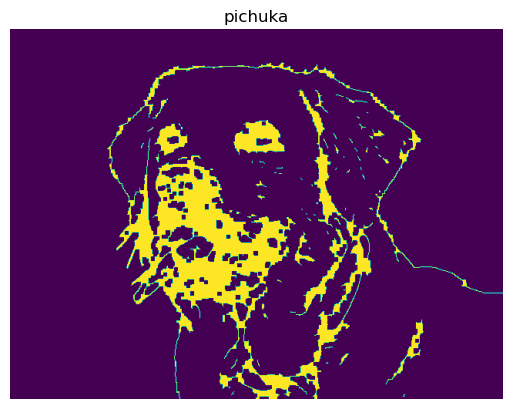

In [44]:
img_1_edge_e = cv2.erode( img_1_edge_d , np.ones( (5,5) , dtype=np.int8 ) )

displayImage(img_1_edge_e)

### Drawings

In [45]:
ones = np.ones( (10,10) )
zeros = np.zeros( (5,10) )
# image = np.concatenate( [ zeros , ones ] )

image.shape

(227, 222, 3)

In [46]:
ones

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [47]:
zeros

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

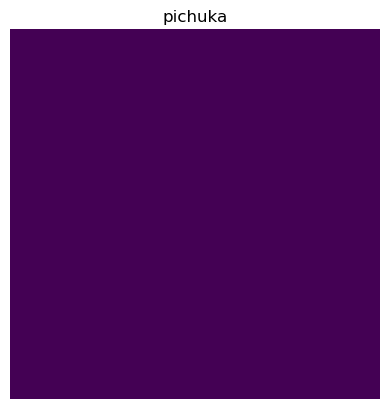

In [48]:
displayImage(ones)

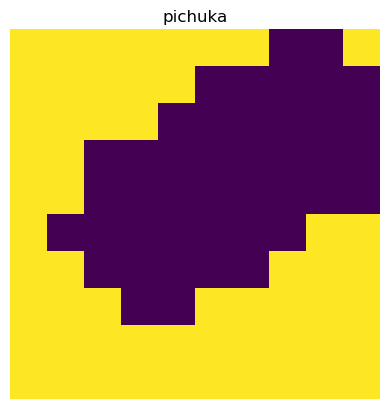

In [49]:
cv2.line( ones , ( 3,5 ) , ( 8,2 ) , (0,255,0) , 3 )

displayImage(ones)

In [50]:
ones

array([[1., 1., 1., 1., 1., 1., 1., 0., 0., 1.],
       [1., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 0., 1., 1., 1.],
       [1., 1., 1., 0., 0., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

### Line

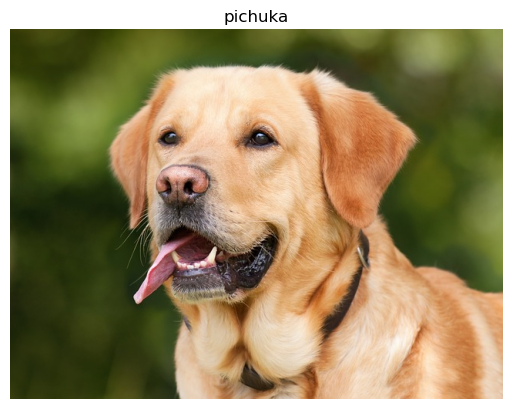

In [51]:
image = cv2.cvtColor( all_images[3] , cv2.COLOR_BGR2RGB )

displayImage(image)

In [52]:
image.shape

(480, 640, 3)

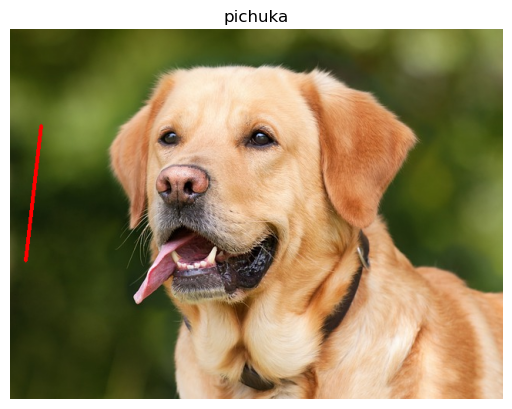

In [53]:
cv2.line( image , ( 40 , 125 ) , ( 20 , 300 ) , ( 255,0,0 ) , 3 )

displayImage(image)

## Rectangle

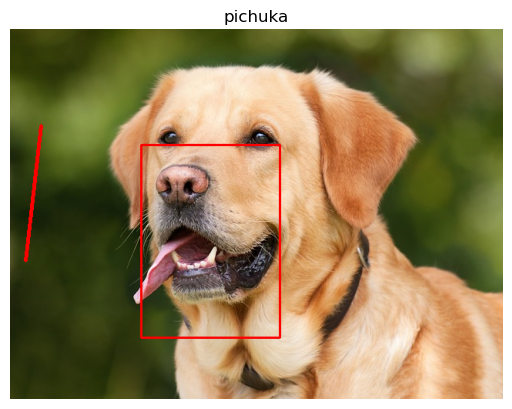

In [54]:
# -1 value to filled rectangle
cv2.rectangle( image , ( 170,150 ) , ( 350,400 ) , (255,0,0) , 2 )

displayImage( image )

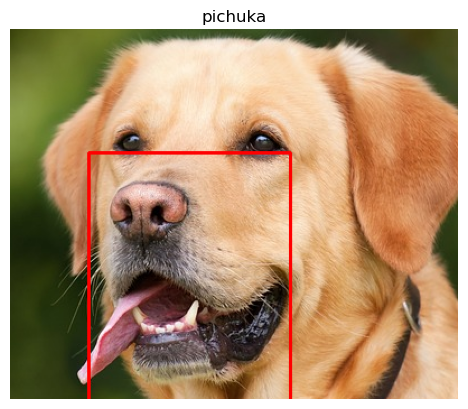

In [55]:
displayImage( image[ 40:370 , 100:500 ] )

## Circle

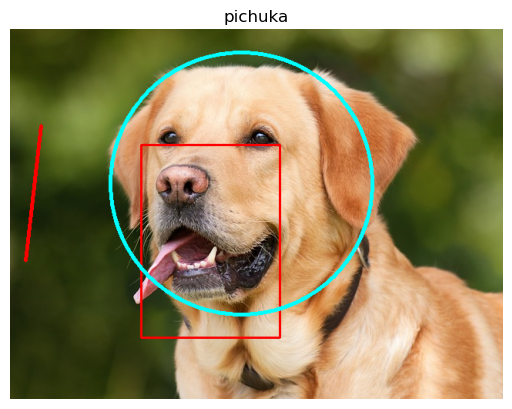

In [56]:
cv2.circle( image , ( 300, 200 ) , 170 , ( 0,255,255 ) , 3  )

displayImage(image)

## Text

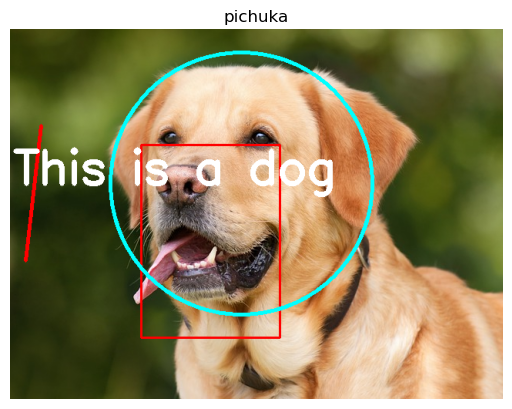

In [57]:
cv2.putText( image , "This is a dog" ,( 5 , 200 ) , cv2.FONT_HERSHEY_SIMPLEX , 2 , (255,255,255) , 5 )

displayImage( image )

## Contours

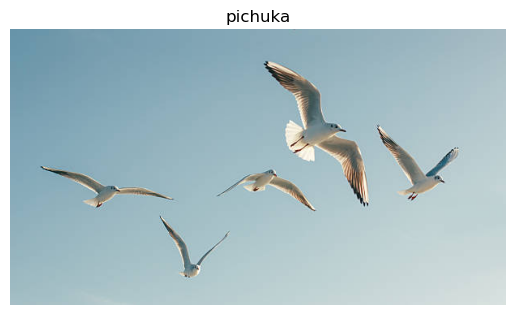

In [58]:
image = cv2.cvtColor( all_images[ 10 ] , cv2.COLOR_BGR2RGB )

displayImage(image)

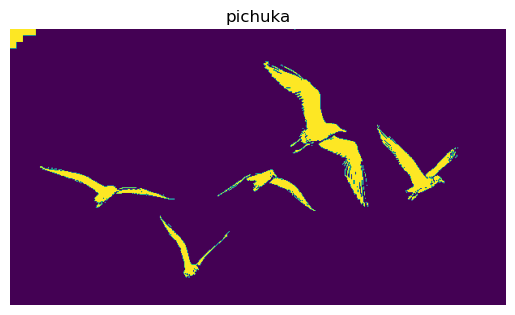

In [59]:
gray_img = cv2.cvtColor( image , cv2.COLOR_BGR2GRAY )

_ , thres_img = cv2.threshold( gray_img , 150 , 255 , cv2.THRESH_BINARY_INV )

displayImage(thres_img)

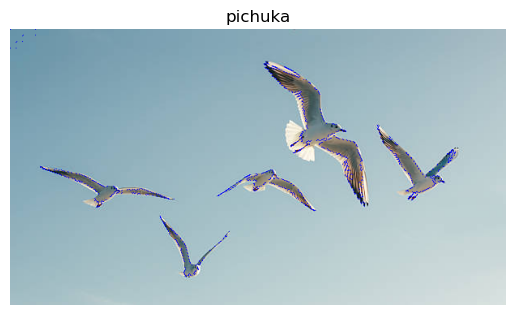

In [60]:
contours , hierarchy = cv2.findContours( thres_img ,cv2.RETR_TREE , cv2.CHAIN_APPROX_SIMPLE )

for cnt in contours:
    if( cv2.contourArea( cnt ) > 10 ):
        cv2.drawContours( image , cnt , -1 , ( 0,0,255 ) , 1 )

displayImage(image)

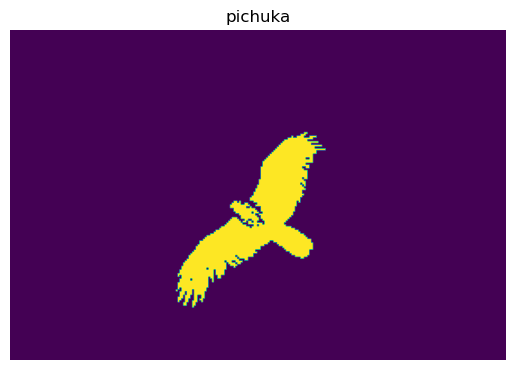

In [61]:
image = cv2.cvtColor( all_images[ 9 ] , cv2.COLOR_BGR2RGB )

gray_img = cv2.cvtColor( image , cv2.COLOR_BGR2GRAY )

_ , thres_img = cv2.threshold( gray_img ,100 , 255 , cv2.THRESH_BINARY_INV  )

displayImage(thres_img)

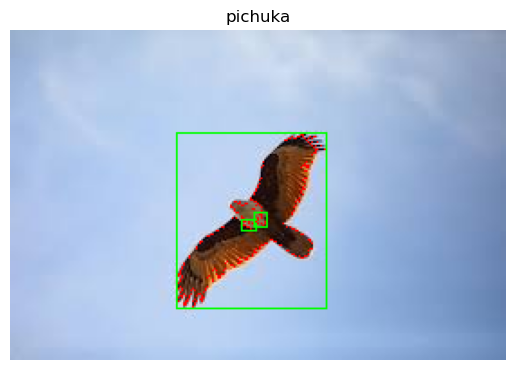

In [62]:
contours , hierarchy = cv2.findContours( thres_img ,cv2.RETR_TREE , cv2.CHAIN_APPROX_SIMPLE )

for cnt in contours:
    if( cv2.contourArea( cnt ) > 10 ):
        cv2.drawContours( image , cnt , -1 , ( 255,0,0 ) , 1 )
        x1,y1,w,h = cv2.boundingRect( cnt )
        
        cv2.rectangle( image , ( x1,y1 ) , (x1+w , y1+h) , ( 0,255,0 ) , 1 )

displayImage(image)

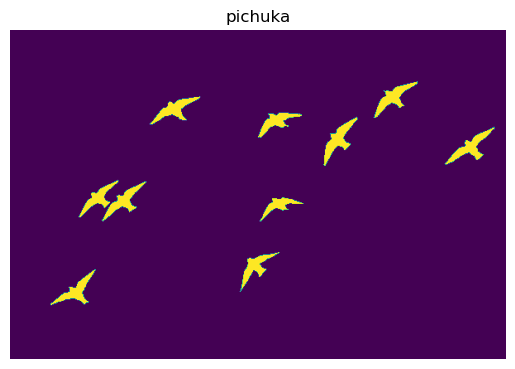

In [63]:
image = cv2.cvtColor( all_images[ 8 ] , cv2.COLOR_BGR2RGB )

gray_img = cv2.cvtColor( image , cv2.COLOR_BGR2GRAY )

_ , thres_img = cv2.threshold( gray_img ,100 , 255 , cv2.THRESH_BINARY_INV  )

displayImage(thres_img)

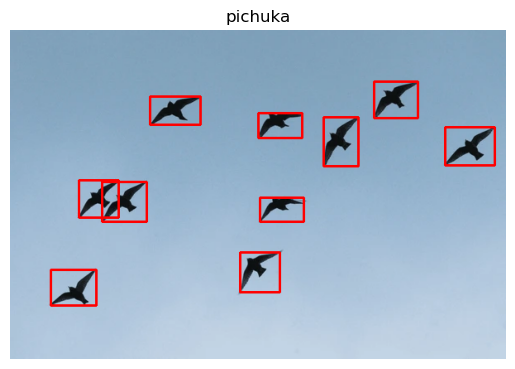

In [64]:
contours , hierarchy = cv2.findContours( thres_img ,cv2.RETR_TREE , cv2.CHAIN_APPROX_SIMPLE )

for cnt in contours:
    
    if( cv2.contourArea( cnt ) > 10 ):
        # return the staring cordinates and height and width 
        x1,y1,w,h = cv2.boundingRect( cnt )
        
        cv2.rectangle( image , ( x1,y1 ) , (x1+w , y1+h) , ( 255,0,0 ) , 2 )

displayImage(image)